In [70]:
# Impoting Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

In [71]:
# Loading Dataset
online_shoppers_intention = pd.read_csv("online_shoppers_intention.csv")

# Exploratory Analysis

In [72]:
# Checking the dimensionality
online_shoppers_intention.shape

(12330, 18)

In [73]:
online_shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [74]:

online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [75]:
online_shoppers_intention.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [76]:
online_shoppers_intention.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [80]:
online_shoppers_intention["Month"].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [81]:
online_shoppers_intention["Month"]= online_shoppers_intention["Month"].replace(["Feb","Mar","May","June","Jul","Aug","Sep","Oct","Nov","Dec"]
,[2,3,5,6,7,8,9,10,11,12],regex=True)            

In [82]:
online_shoppers_intention["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [83]:
online_shoppers_intention["VisitorType"] = online_shoppers_intention["VisitorType"].replace(["Returning_Visitor","New_Visitor","Other"],[0,1,2],regex=True)

In [84]:
# Checking for duplicate rows
duplicateRows = online_shoppers_intention.duplicated().sum()
print("Total number of duplicate rows:", duplicateRows)


Total number of duplicate rows: 125


In [85]:
online_shoppers_intention.drop_duplicates(inplace=True)

In [86]:
duplicateRows = online_shoppers_intention.duplicated().sum()
print("Total number of duplicate rows:", duplicateRows)

Total number of duplicate rows: 0


In [87]:
online_shoppers_intention["Revenue"].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

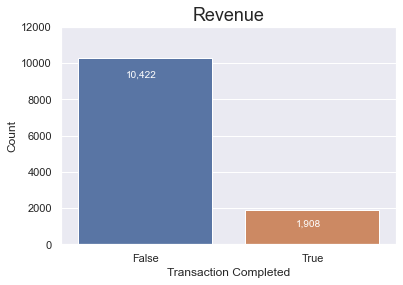

In [88]:
sns.set(style="darkgrid") #style the plot background to become a grid
sns.countplot(online_shoppers_intention['Revenue'])
plt.ylim(0,12000)
plt.title('Revenue', fontsize= 18)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.text(x=-.115, y=9200 ,s='10,422', fontsize=10, color="white")
plt.text(x=.899, y=1000, s='1,908', fontsize=10, color= "white")
plt.show()


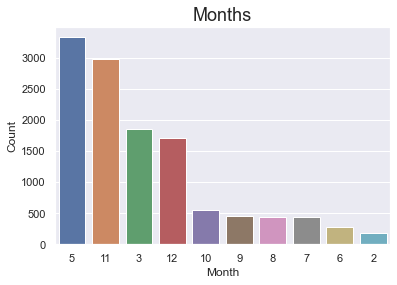

In [89]:
sns.set(style="darkgrid") #style the plot background to become a grid
MonthlyValue = online_shoppers_intention['Month'].value_counts()
sns.countplot(online_shoppers_intention['Month'], order=MonthlyValue.index)

plt.title('Months', fontsize= 18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


## Univariate Analysis


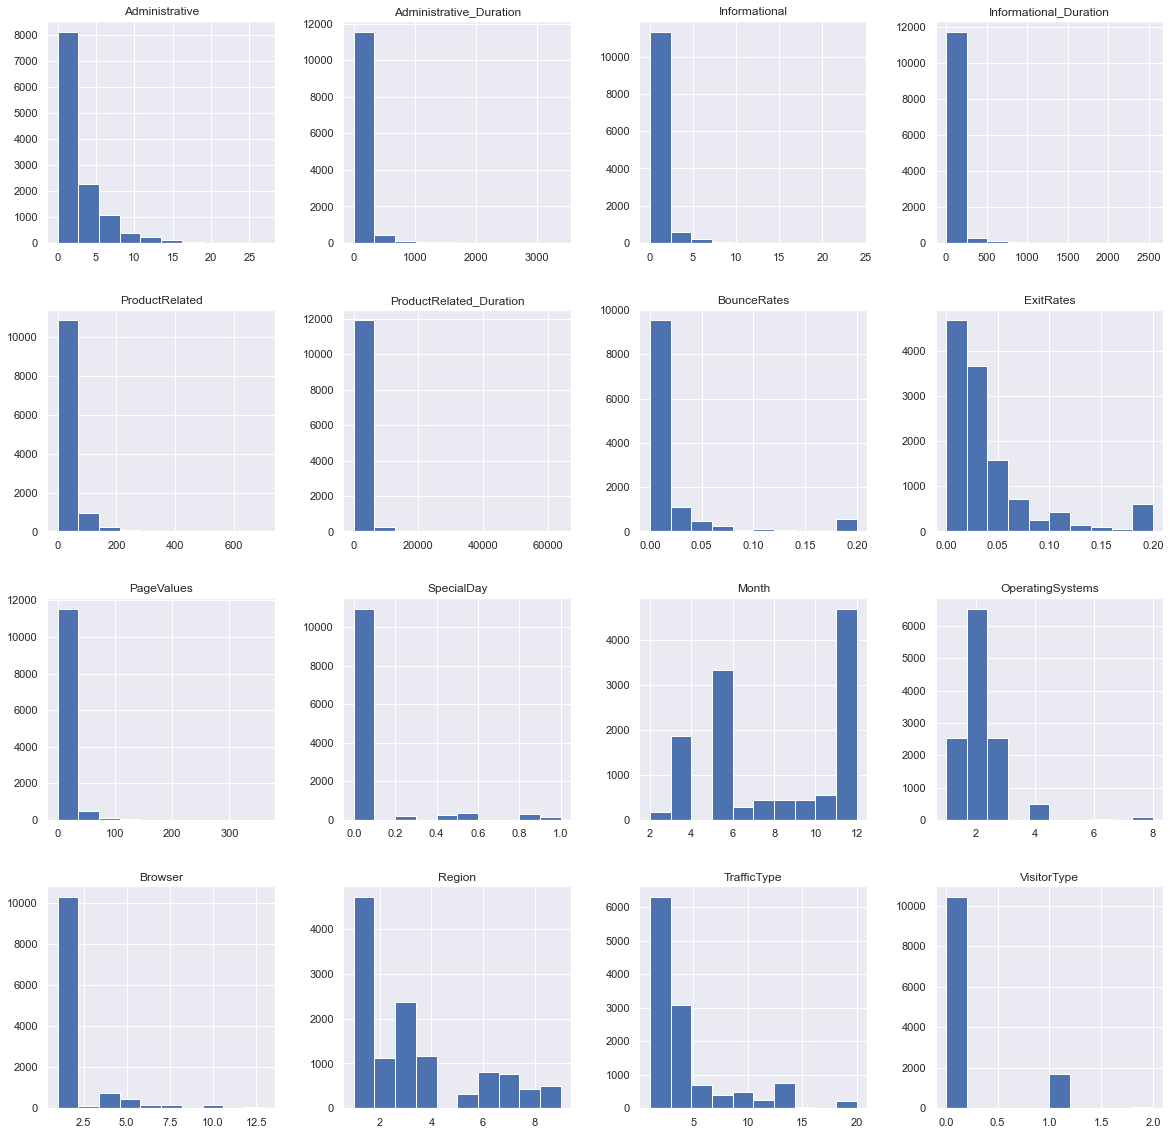

In [90]:
online_shoppers_intention.hist()
plt.gcf().set_size_inches(20,20)
plt.show()

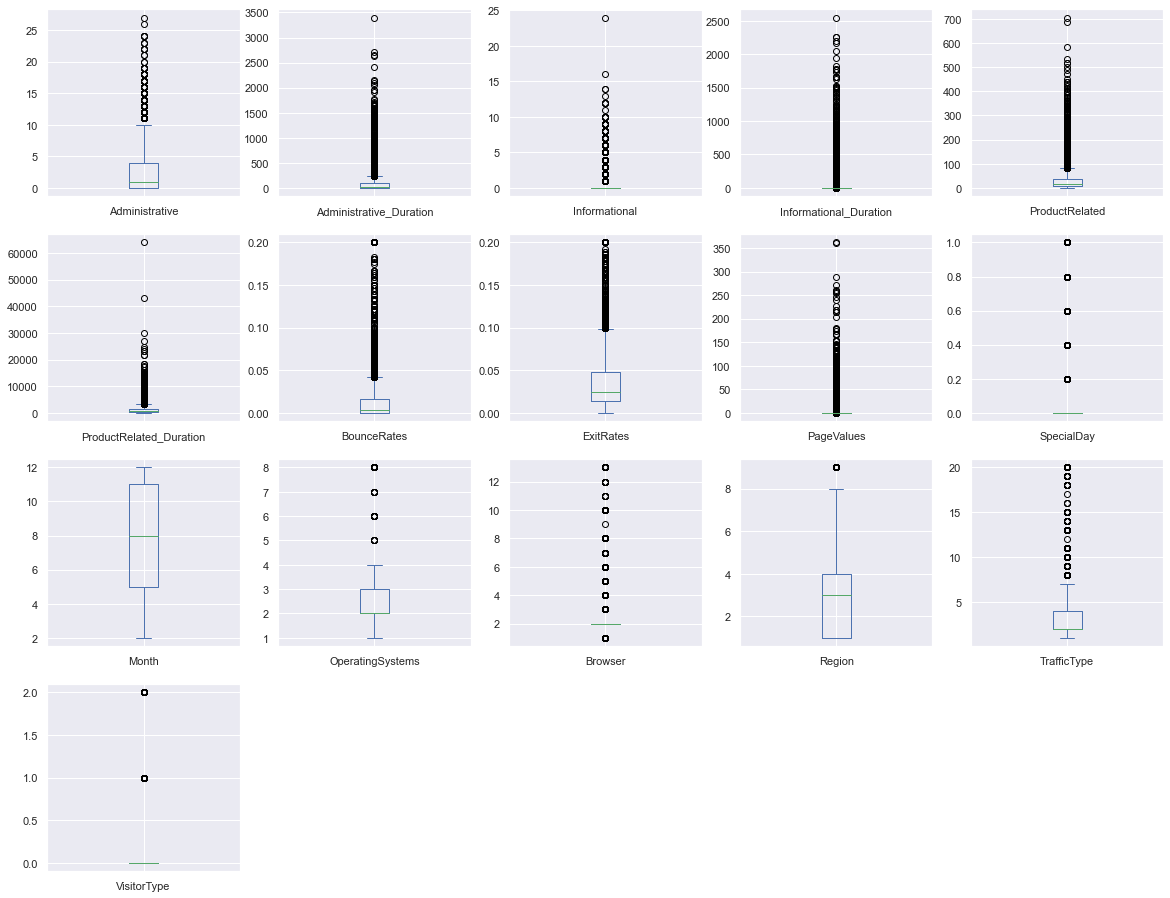

In [91]:
online_shoppers_intention.plot(kind="box", subplots=True, layout=(5,5), sharex=False)
plt.gcf().set_size_inches(20,20)

In [92]:
online_shoppers_intention.skew()

Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
Month                     -0.062340
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
VisitorType                2.303936
Weekend                    1.255097
Revenue                    1.892862
dtype: float64

# Multivariate Analysis

In [93]:
data_correlations= online_shoppers_intention.corr(method = "pearson")
print(data_correlations)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.600457   
Administrative_Duration        0.600457                 1.000000   
Informational                  0.375256                 0.301419   
Informational_Duration         0.254813                 0.237211   
ProductRelated                 0.428305                 0.286863   
ProductRelated_Duration        0.371146                 0.353583   
BounceRates                   -0.213096                -0.136913   
ExitRates                     -0.311255                -0.201971   
PageValues                     0.097017                 0.066228   
SpecialDay                    -0.096951                -0.074666   
Month                          0.094423                 0.056250   
OperatingSystems              -0.006586                -0.007529   
Browser                       -0.025622                -0.015742   
Region                        -0.007262         

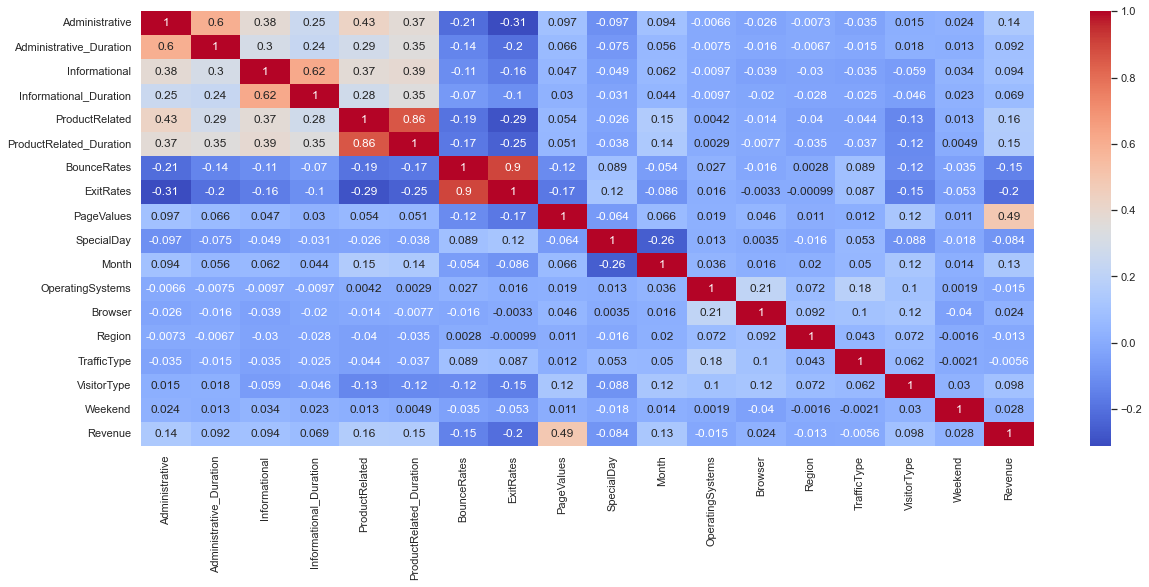

In [94]:
sns.heatmap(data_correlations, annot=True, cmap="coolwarm")
plt.gcf().set_size_inches(20,8)
plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.feature_selection import RFECV

In [96]:
# Split data into train and test sets 
from sklearn.model_selection import train_test_split 

X = online_shoppers_intention.drop('Revenue',axis=1).values
y = online_shoppers_intention["Revenue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Feature Selection

In [97]:
from sklearn.feature_selection import VarianceThreshold 

variance_selector = VarianceThreshold(threshold=0) 
X_train_fs = variance_selector.fit_transform(X_train) 
X_test_fs = variance_selector.transform(X_test) 
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

8 features have been removed, 9 features remain


In [69]:
#selected_features = variance_selector.get_support() 
#selected_features = selected_features.reshape(17,17) 
# Visualise which pixels have been dropped 
#sns.heatmap(selected_features,cmap='rocket')

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train) 
X_test_s = sc.transform(X_test)

In [103]:
rf = RandomForestClassifier(random_state=0) 

# Use RandomForestClassifier as the base model 
rfecv = RFECV(rf, cv=5, step=5) 
X_train_fs = rfecv.fit_transform(X_train_s, y_train) 
X_test_fs = rfecv.transform(X_test_s) 
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 7


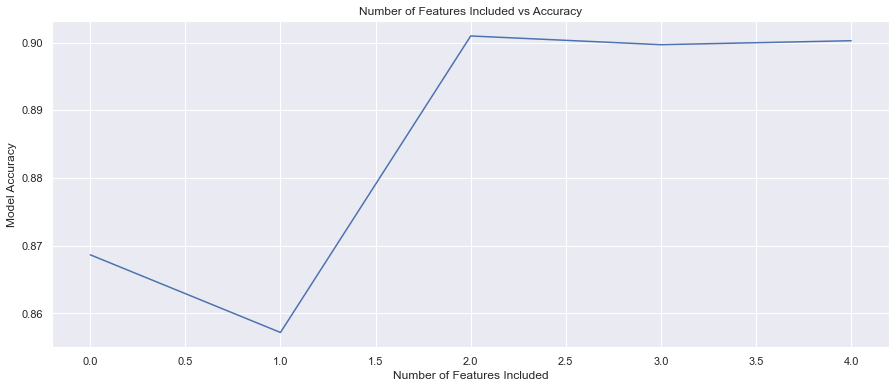

In [105]:
plt.figure( figsize=(15, 6)) 
plt.title('Number of Features Included vs Accuracy') 
plt.xlabel('Number of Features Included') 
plt.ylabel('Model Accuracy') 
plt.plot(rfecv.cv_results_['mean_test_score']) 
plt.show()

# Hyperparameter Tuning

In [108]:
def print_results(results) :
    print("Best Parameters: {}\n".format(results.best_params_))
    means = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2, 3), params))
        

In [110]:
rf = RandomForestClassifier()
parameters = {
    "n_estimators" : [5,50,250],
    "max_depth" : [2,4,8,16,32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train_fs, y_train.ravel())
print_results(cv)

Best Parameters: {'max_depth': 8, 'n_estimators': 250}

0.856 (+/-0.037) for {'max_depth': 2, 'n_estimators': 5}
0.844 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.844 (+/-0.0) for {'max_depth': 2, 'n_estimators': 250}
0.894 (+/-0.014) for {'max_depth': 4, 'n_estimators': 5}
0.896 (+/-0.005) for {'max_depth': 4, 'n_estimators': 50}
0.897 (+/-0.005) for {'max_depth': 4, 'n_estimators': 250}
0.895 (+/-0.009) for {'max_depth': 8, 'n_estimators': 5}
0.901 (+/-0.008) for {'max_depth': 8, 'n_estimators': 50}
0.902 (+/-0.012) for {'max_depth': 8, 'n_estimators': 250}
0.893 (+/-0.006) for {'max_depth': 16, 'n_estimators': 5}
0.898 (+/-0.01) for {'max_depth': 16, 'n_estimators': 50}
0.9 (+/-0.007) for {'max_depth': 16, 'n_estimators': 250}
0.887 (+/-0.011) for {'max_depth': 32, 'n_estimators': 5}
0.899 (+/-0.009) for {'max_depth': 32, 'n_estimators': 50}
0.899 (+/-0.008) for {'max_depth': 32, 'n_estimators': 250}
0.882 (+/-0.012) for {'max_depth': None, 'n_estimators': 5}
0.9 (+/-0.008

In [113]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_selectedfeatures = RandomForestClassifier(n_estimators=250, max_depth = 8)
rf_selectedfeatures.fit(X_train_fs, y_train)

RandomForestClassifier(max_depth=8, n_estimators=250)

Accuracy Score: 90.28%


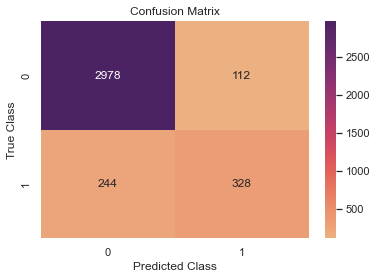

In [114]:
# Make predictions on the test data 
y_pred = rf_selectedfeatures.predict(X_test_fs) 
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%") 
cm = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 

plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()